<a href="https://colab.research.google.com/github/MANDOJU1/pandas/blob/main/7_%EB%94%B0%EB%A6%89%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 따릉이
- 서울 열린 데이터광장에서 제공하는 서울시 공공 자전거 데이터 셋
  - 서울특별시 공공자전거 대여소 정보
  - 서울특별시 공공자전거 대여소별 이용정보(월별)
  - 서울특별시 공공자전거 이용정보(시간대별)


In [36]:
!pip install koreanize_matplotlib

# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 1. 공공자전거 대여소 정보

In [39]:
# 데이터 로드

df_bike1 = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/공공자전거 대여소 정보(23.12월 기준).xlsx",
                        skiprows=4)
df_bike1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [40]:
# 컬럼명 변경
# 대여소번호, 대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식

df_bike1.columns = ['대여소번호', '대여소명','자치구','상세주소','위도','경도','설치시기','거치대수lcd','거치대수qr','운영방식']
df_bike1.columns

Index(['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr',
       '운영방식'],
      dtype='object')

In [41]:
df_bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여소번호    2762 non-null   int64         
 1   대여소명     2762 non-null   object        
 2   자치구      2762 non-null   object        
 3   상세주소     2762 non-null   object        
 4   위도       2762 non-null   float64       
 5   경도       2762 non-null   float64       
 6   설치시기     2762 non-null   datetime64[ns]
 7   거치대수lcd  1454 non-null   float64       
 8   거치대수qr   1653 non-null   float64       
 9   운영방식     2762 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 215.9+ KB


In [42]:
df_bike1.describe()

,대여소번호,위도,경도,설치시기,거치대수lcd,거치대수qr
count,2762.000000,2762.000000,2762.000000,2762,1454.000000,1653.000000
mean,2351.479363,37.547397,126.991328,2019-03-22 19:28:10.305573632,12.620358,12.035088
min,102.000000,37.430977,126.798599,2015-01-07 00:00:00,5.000000,2.000000
25%,1009.250000,37.505236,126.914299,2017-06-20 10:01:52.249999872,10.000000,10.000000
50%,2070.500000,37.545483,127.003372,2018-11-14 00:00:00,10.000000,10.000000
75%,3779.750000,37.577336,127.063763,2020-12-03 00:00:00,15.000000,15.000000
max,6172.000000,37.691013,127.180756,2023-12-12 00:00:00,46.000000,62.000000
std,1569.395956,0.052343,0.092762,NaN,4.962103,6.079476


In [43]:
df_bike1.describe(include=object)

,대여소명,자치구,상세주소,운영방식
count,2762,2762,2762,2762
unique,2761,25,2682,2
top,한양수자인아파트 앞,송파구,국회의사당 경내,QR
freq,2,217,7,1648


## 2. 대여소별 이용정보

In [44]:
df_bike2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/대여소별 이용정보(월별)_23.7-12.csv",
                       encoding="cp949")
df_bike2.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202307,2019,2019
1,양천구,729. 서부식자재마트 건너편,202307,2105,2268
2,양천구,731. 서울시 도로환경관리센터,202307,3975,4042
3,양천구,732. 신월중학교,202307,1284,1260
4,양천구,733. 신정이펜하우스314동,202307,934,451


In [45]:
df_bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16381 entries, 0 to 16380
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     16381 non-null  object
 1   대여소명    16381 non-null  object
 2   기준년월    16381 non-null  int64 
 3   대여건수    16381 non-null  int64 
 4   반납건수    16381 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 640.0+ KB


In [46]:
df_bike2.describe()

,기준년월,대여건수,반납건수
count,16381.000000,16381.000000,16381.000000
mean,202309.499420,1419.217142,1413.559856
std,1.707972,1364.094961,1420.829090
min,202307.000000,1.000000,0.000000
25%,202308.000000,523.000000,468.000000
50%,202309.000000,1029.000000,1010.000000
75%,202311.000000,1864.000000,1877.000000
max,202312.000000,21106.000000,21201.000000


## 3. 공공자건거 이용정보(시간대별)

In [47]:
df_bike3 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/공공자전거 이용정보(시간대별)_2312.csv",
                       encoding="cp949")
df_bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리
0,2023-12-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,6.88,0.40,1738.19
1,2023-12-01,0,1569,1569.수유역2번출구,정기권,NaN,~10대,1,78.37,0.61,2638.76
2,2023-12-01,0,736,736. 오솔길공원,정기권,NaN,20대,1,40.91,0.32,1377.52
3,2023-12-01,0,740,740. 으뜸공원,정기권,NaN,20대,1,90.50,0.53,2285.26
4,2023-12-01,0,505,505. 자양사거리 광진아크로텔 앞,정기권,NaN,20대,1,21.38,0.21,900.00


In [48]:
df_bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954959 entries, 0 to 1954958
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   대여소명    object 
 4   대여구분코드  object 
 5   성별      object 
 6   연령대코드   object 
 7   이용건수    int64  
 8   운동량     float64
 9   탄소량     float64
 10  이동거리    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 164.1+ MB


In [49]:
# '상세주소', '위도', '경도',  컬럼 제거

df_bike1.columns

Index(['대여소번호', '대여소명', '자치구', '상세주소', '위도', '경도', '설치시기', '거치대수lcd', '거치대수qr',
       '운영방식'],
      dtype='object')

In [50]:
df_bike1.drop(columns=['상세주소', '위도', '경도'], inplace=True)

In [51]:
df_bike1.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
거치대수lcd    1308
거치대수qr     1109
운영방식          0
dtype: int64

In [52]:
# df_bike1['거치대수lcd'] NaN 처리 : 0

df_bike1['거치대수lcd'].fillna(0, inplace=True)
df_bike1['거치대수qr'].fillna(0, inplace=True)

In [53]:
# df_bike1['대여소번호'].dtype object 변경

df_bike1['대여소번호'] = df_bike1['대여소번호'].astype(object)
df_bike1['대여소번호'].dtype

dtype('O')

In [54]:
df_bike2.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202307,2019,2019
1,양천구,729. 서부식자재마트 건너편,202307,2105,2268
2,양천구,731. 서울시 도로환경관리센터,202307,3975,4042
3,양천구,732. 신월중학교,202307,1284,1260
4,양천구,733. 신정이펜하우스314동,202307,934,451


In [55]:
# 대여소명 : 숫자와 문자 분리 후 새 컬럼으로 생성
# 대여소번호
# 대여소명_new

df_bike2['대여소번호'] = df_bike2['대여소명'].str.split(".", expand=True)[0]
df_bike2['대여소명_new'] = df_bike2['대여소명'].str.split(".", expand=True)[1]

In [56]:
df_bike2.head()

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202307,2019,2019,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202307,2105,2268,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202307,3975,4042,731,서울시 도로환경관리센터
3,양천구,732. 신월중학교,202307,1284,1260,732,신월중학교
4,양천구,733. 신정이펜하우스314동,202307,934,451,733,신정이펜하우스314동


In [57]:
# 대여소명_new None 상태인 행 조회

# df_bike2[df_bike2['대여소명_new'] == None] (X)

df_bike2[df_bike2['대여소명_new'].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
1259,성동구,AS센터,202307,88,4,AS센터,None
3989,성동구,AS센터,202308,53,3,AS센터,None
6714,성동구,AS센터,202309,82,4,AS센터,None
9441,성동구,AS센터,202310,46,2,AS센터,None
12171,성동구,AS센터,202311,2,0,AS센터,None
14893,성동구,AS센터,202312,9,3,AS센터,None


In [58]:
# 대여소명_new 가 없는 행 제거

df_bike2 = df_bike2.dropna(subset='대여소명_new')

In [59]:
df_bike3.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리
0,2023-12-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,6.88,0.40,1738.19
1,2023-12-01,0,1569,1569.수유역2번출구,정기권,NaN,~10대,1,78.37,0.61,2638.76
2,2023-12-01,0,736,736. 오솔길공원,정기권,NaN,20대,1,40.91,0.32,1377.52


In [60]:
df_bike3['대여소명_new'] = df_bike3['대여소명'].str.split(".", expand=True)[1]
df_bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,대여소명_new
0,2023-12-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,6.88,0.4,1738.19,용마사거리


In [61]:
# 성별 컬럼에 어떤 값을 가지고 있는지 확인

df_bike3['성별'].unique()

array([nan, 'F', 'M', 'm', 'f'], dtype=object)

In [62]:
df_bike3['성별'].value_counts()

성별
M    914961
F    477863
m       231
f       123
Name: count, dtype: int64

In [63]:
# 성별 m => M, f => F 변경


# df_bike3.loc[행, 열] = 변경값

df_bike3.loc[df_bike3['성별'] == 'm', '성별'] = 'M'
df_bike3.loc[df_bike3['성별'] == 'f', '성별'] = 'F'

In [64]:
df_bike3['성별'].value_counts()

성별
M    915192
F    477986
Name: count, dtype: int64

In [65]:
df_bike3['성별'].isnull().sum()

561781

In [66]:
df_bike3.dtypes

대여일자         object
대여시간          int64
대여소번호         int64
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량         float64
탄소량         float64
이동거리        float64
대여소명_new     object
dtype: object

In [67]:
# datetime64[ns]

df_bike3['대여일자'] = pd.to_datetime(df_bike3['대여일자'])

In [68]:
print(df_bike3['대여일자'].dtypes)

datetime64[ns]


- 이동거리 / 평균사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는?
- 자전거를 가장 많이 이용하는 성별은?
- 서울시 구별 거치대 설치 개수는?
- 서울시 구별 대여건수는?

In [69]:
# 이동거리 / 평균사용시간이 높은 대여소는?

# 대여소명_new 기준으로 이동거리 평균 추출 후 가장 높은 순으로 확인
df_bike3.groupby("대여소명_new")['이동거리'].mean().reset_index().sort_values('이동거리',ascending=False)

,대여소명_new,이동거리
1451,압구정나들목,7075.545476
623,동작역 5번출구 동작주차공원,7074.623533
1168,서원마을,6978.664545
1971,청담나들목입구,6948.572963
1965,청계천 생태교실 앞,6917.649474
...,...,...
2197,흑석한강푸르지오 106동앞,1066.251667
711,마곡역1번출구,1013.331547
1154,서울연신중학교,930.132072
1921,진관동 은빛초등학교,926.705018


In [70]:
# df_bike3.groupby("대여소명_new")[['이동거리']].mean()

In [71]:
df_bike3.groupby("대여소명_new")['대여시간'].mean().reset_index().sort_values('대여시간',ascending=False).head(10)

,대여소명_new,대여시간
1774,인재개발원 배움관,17.018868
1124,서울숲 IT캐슬,16.705882
50,LG사이언스파크 E7동,16.448773
2479,서울추모공원 입구,16.444444
1295,수출의 다리 아래,16.373518
2072,한국과학기술연구원 중문,16.356061
491,대륭포스트타워1차,16.334195
917,보타닉파크타워2,16.315744
898,벽산 디지털밸리 5차,16.193587
2146,홈플러스 마포점 앞,16.190774


Text(0.5, 1.0, '이동거리에 따른 운동량(연령대별)')

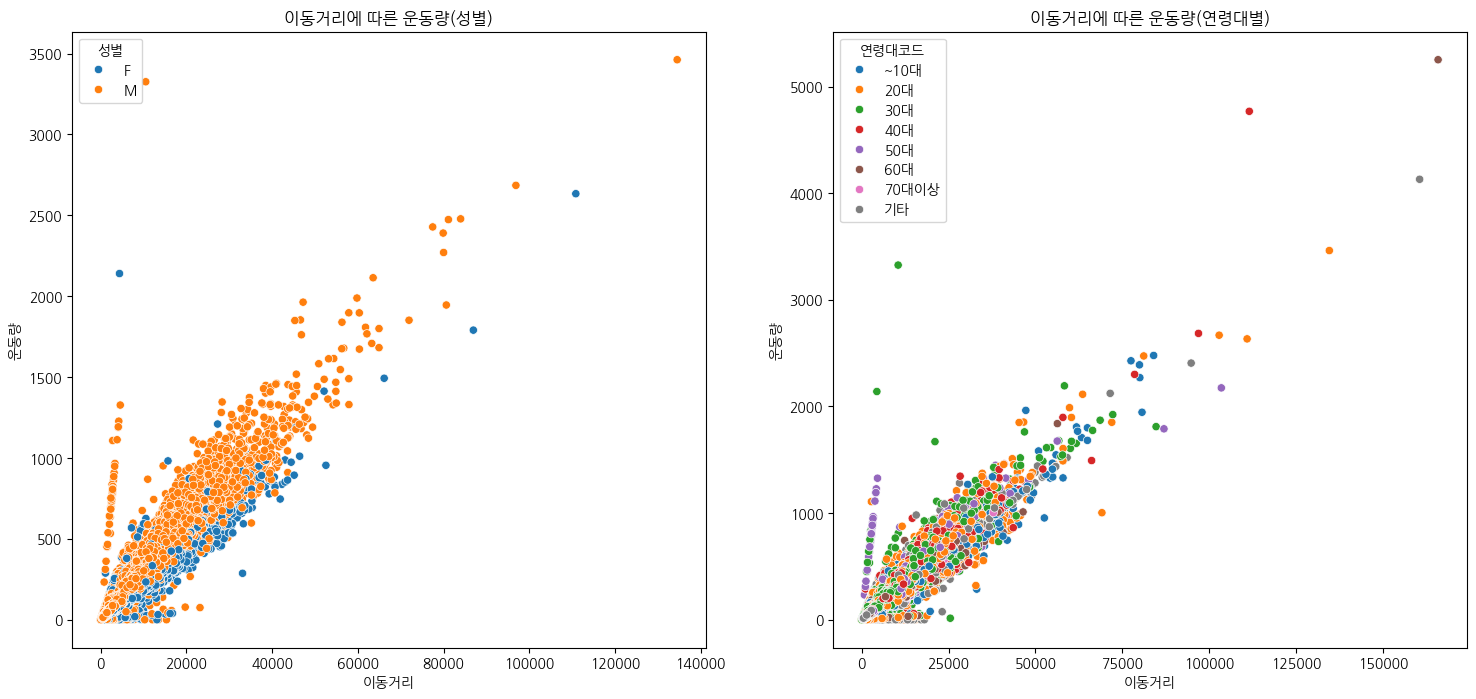

In [72]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

sns.scatterplot(data=df_bike3, x='이동거리', y='운동량', ax=ax[0], hue='성별')
ax[0].set_title('이동거리에 따른 운동량(성별)')

sns.scatterplot(data=df_bike3, x='이동거리', y='운동량', ax=ax[1], hue='연령대코드')
ax[1].set_title('이동거리에 따른 운동량(연령대별)')

In [74]:
# 대여 일자에 따른 남녀 대여건수 비교

df_bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,대여소명_new
0,2023-12-01,0,3517,3517. 용마사거리,정기권,NaN,~10대,1,6.88,0.40,1738.19,용마사거리
1,2023-12-01,0,1569,1569.수유역2번출구,정기권,NaN,~10대,1,78.37,0.61,2638.76,수유역2번출구
2,2023-12-01,0,736,736. 오솔길공원,정기권,NaN,20대,1,40.91,0.32,1377.52,오솔길공원
3,2023-12-01,0,740,740. 으뜸공원,정기권,NaN,20대,1,90.50,0.53,2285.26,으뜸공원
4,2023-12-01,0,505,505. 자양사거리 광진아크로텔 앞,정기권,NaN,20대,1,21.38,0.21,900.00,자양사거리 광진아크로텔 앞


In [81]:
# df_bike3['대여일자'].dtype

df_bike3['대여년'] = df_bike3['대여일자'].dt.year
df_bike3['대여월'] = df_bike3['대여일자'].dt.month
df_bike3['대여일'] = df_bike3['대여일자'].dt.day

In [82]:
# pivot_table: index- 대여일, columns- 성별, values-대여시간, sum
bike_pivot = df_bike3.pivot_table(index='대여일', columns='성별', values='대여시간', aggfunc=sum)
bike_pivot

성별,F,M
대여일,,
1,295499,523371
2,230406,427747
3,206223,394153
4,366608,631314
5,406541,694135
6,252462,467752
7,394331,679492
8,428183,741528
9,341597,603515


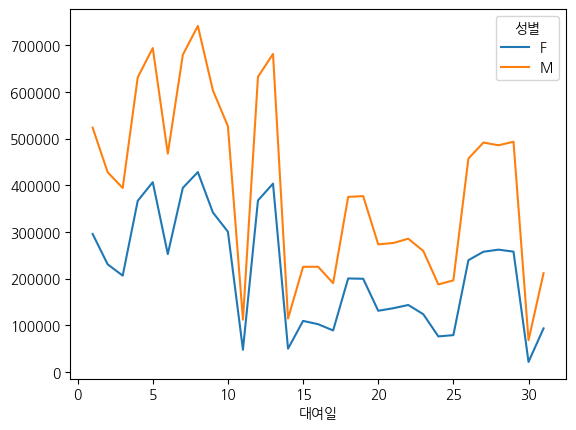

In [85]:
# bike_pivot 시각화

bike_pivot.plot();

In [86]:
df_bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR


In [87]:
# 총거치대수 = 거치대수lcd + 거치대수qr

df_bike1['총거치대수'] = df_bike1['거치대수lcd'] + df_bike1['거치대수qr']

In [88]:
df_bike1.head(2)

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR,40.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR,24.0


In [92]:
# 구별 설치 거치대 개수

bike_sum = df_bike1.groupby('자치구')['총거치대수'].sum().reset_index().set_index('자치구')
bike_sum

,총거치대수
자치구,
강남구,1953.0
강동구,1535.0
강북구,649.0
강서구,3100.0
관악구,987.0
광진구,1407.0
구로구,1386.0
금천구,915.0
노원구,1705.0


In [95]:
# 지도 시각화 라이브러리 설치

!pip install folium

In [96]:
import folium
from folium import plugins

In [97]:
import json

geo_path= '/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/skorea_municipalities_geo_simple.json'

# 우리나라 위경도 데이터로드
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [103]:
m = folium.Map(location=(37.5502, 126.982), zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=bike_sum['총거치대수'],
    fill_color='YlGnBu',
    key_on="properties.name",
    legend_name="Number of Parking lots (%)"
).add_to(m)

m

In [108]:
# 대여건수

# df_bike2.head()
bike_sum2 = df_bike2.groupby('자치구')['대여건수'].sum().reset_index().set_index("자치구")
bike_sum2

,대여건수
자치구,
강남구,734454
강동구,994034
강북구,333355
강서구,2804423
관악구,569252
광진구,1125560
구로구,953557
금천구,419693
노원구,1388386


In [110]:
m = folium.Map(location=(37.5502, 126.982), zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=bike_sum2['대여건수'],
    fill_color='PuRd',
    key_on="properties.name",
    legend_name="Number of Parking lots (%)"
).add_to(m)

m